In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import string
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [6]:
file_dir = "/data/asr_introspection/spectrogram_input/"
input_groupmappings = os.listdir(file_dir)
input_groupmappings = [s for s in input_groupmappings if "group" in s]

In [7]:
graphemes_list = list()
phonemes_list = list()
phonemes_full_list = list()

# create a set of all occuring phonemes (both with and without stress symbols)
for f in input_groupmappings:
    mapping = np.load(file_dir + f)
    graphemes_list = np.unique(np.concatenate((graphemes_list,mapping[:,1])))
    phonemes_list = np.unique(np.concatenate((phonemes_list,mapping[:,2])))
    phonemes_full_list = np.unique(np.concatenate((phonemes_full_list,mapping[:,3])))
graphemes_list = list(np.sort(graphemes_list))
phonemes_list = list(np.sort(phonemes_list))
phonemes_full_list = list(np.sort(phonemes_full_list))
with open('/data/asr_introspection/vocabularies.pkl', 'wb') as f:
    pickle.dump([graphemes_list,phonemes_list,phonemes_full_list], f, pickle.HIGHEST_PROTOCOL)

finished 500
finished 1000
finished 1500
finished 2000
finished 2500
finished 3000
finished 3500
finished 4000
finished 4500
finished 5000


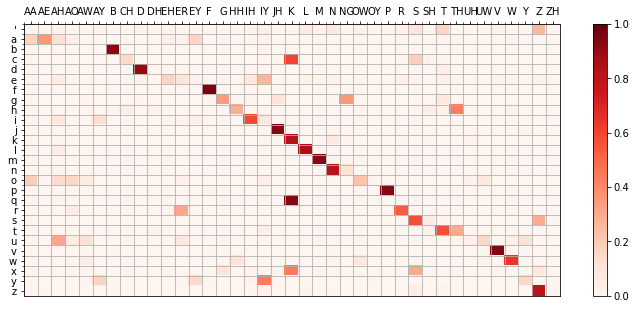

In [8]:
# count co-occurence of graphemes & phonemes

count_matrix = np.zeros((len(graphemes_list),len(phonemes_list)))

for f_id,f in enumerate(input_groupmappings):
    mapping = np.load(file_dir + f)
    for _,g,p,_ in mapping:
        if(p != " "):
            count_matrix[graphemes_list.index(g),phonemes_list.index(p)] += 1
    if((f_id+1) % 500==0):
        print("finished " + str(f_id+1))

        
# plot co-occurences normalized to letter count
heatmap_matrix = count_matrix[:,1:]
for i in range(len(graphemes_list)):
    heatmap_matrix[i,:] = heatmap_matrix[i,:]/np.sum(heatmap_matrix[i,:])

fig, ax = plt.subplots(figsize=(12,5))
heatmap = ax.pcolor(heatmap_matrix, cmap=plt.cm.Reds)
heatmap.set_clim((0,1))
fig.colorbar(heatmap)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(len(phonemes_list)-1) + 0.5, minor=False)
ax.set_yticks(np.arange(len(graphemes_list)) + 0.5, minor=False)

ax.set_xticks(np.arange(len(phonemes_list)-1), minor=True)
ax.set_yticks(np.arange(len(graphemes_list)-1), minor=True)

ax.grid(True,which='minor')

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(phonemes_list[1:], minor=False)
ax.set_yticklabels(graphemes_list, minor=False)

plt.show()